In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
iris = load_iris()
X = iris.data  # features
y = iris.target  # labels
print(iris.feature_names)  # ['sepal length (cm)', 'sepal width (cm)', ...]
print(iris.target_names)   # ['setosa', 'versicolor', 'virginica']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
# Check shapes
print("Shape of original features:", X.shape)
print("Shape of original target:", y.shape)

Shape of original features: (150, 4)
Shape of original target: (150,)


In [ ]:
#creating the data frame
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['target_name'] = data['target'].apply(lambda x: iris.target_names[x])

#displaying
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/11H8E4uH1K_5OLLXwrtGkRdQT7lPv1SucrMUk0aJohOM/edit#gid=0


In [ ]:
print(len(data))

150


### We are going to conduct sone data cleaning to make sure the data is ready for the models

In [ ]:
# View basic info
print("Basic Info:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check class distribution
print("\nTarget Class Distribution:")
print(data['target_name'].value_counts())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.8000

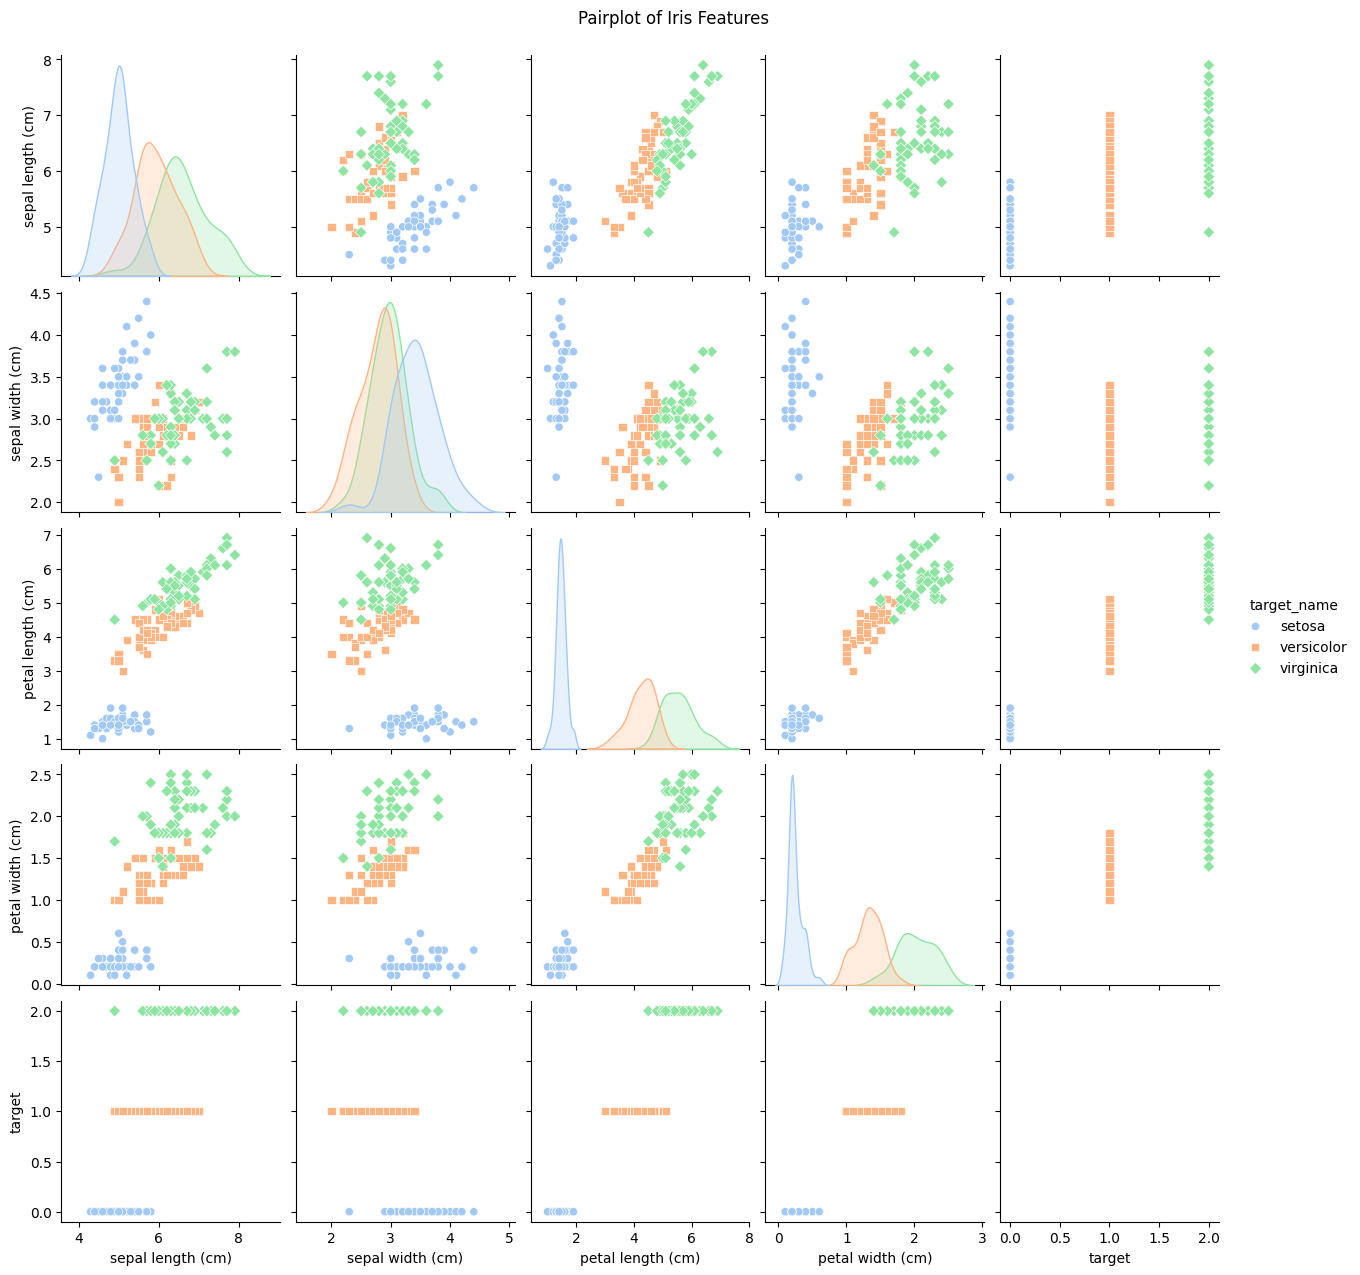

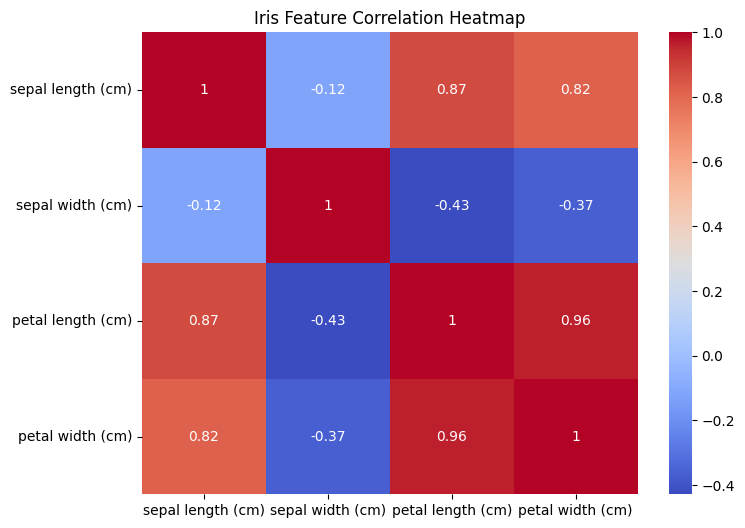

In [ ]:
# Pairplot to see relationships between features
sns.pairplot(data, hue="target_name", markers=["o", "s", "D"], palette="pastel")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.iloc[:, :-2].corr(), annot=True, cmap='coolwarm')
plt.title("Iris Feature Correlation Heatmap")
plt.show()


In [ ]:
# Drop duplicates if any
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

1
0


In [ ]:
for i in data.columns:
    print(f'In the {data[i]} column:')
    data[i].unique

In the 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 149, dtype: float64 column:
In the 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 149, dtype: float64 column:
In the 0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 149, dtype: float64 column:
In the 0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 149, dtype: float64 column:
In the 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 149, dtype: int64 column:
In the 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa


In [ ]:
# Compute correlation matrix from features only (exclude target columns)
corr_matrix = data.iloc[:, :-2].corr()

# Extract the upper triangle of the correlation matrix without the diagonal
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack to get (feature1, feature2): correlation pairs, then drop NaNs
sorted_corr = (
    upper_tri.unstack()
    .dropna()
    .sort_values(key=lambda x: abs(x), ascending=False)
)

# Convert to list of tuples
correlation_list = [(idx[0], idx[1], val) for idx, val in sorted_corr.items()]

# Print the sorted correlations
for f1, f2, val in correlation_list:
    print(f"{f1} & {f2}: {val:.2f}")

petal width (cm) & petal length (cm): 0.96
petal length (cm) & sepal length (cm): 0.87
petal width (cm) & sepal length (cm): 0.82
petal length (cm) & sepal width (cm): -0.43
petal width (cm) & sepal width (cm): -0.36
sepal width (cm) & sepal length (cm): -0.12


## First Try

In [ ]:
# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**(a) K-Nearest Neighbors (KNN)**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 1.0


**(b) Logistic Regresssion**

In [ ]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 1.0


**(c) Decision Tree**

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)  # no scaling needed
y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree Accuracy: 1.0


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=5)
print("KNN CV Accuracy:", scores.mean())

scores = cross_val_score(logreg, X, y, cv=5)
print("Logistic Regression CV Accuracy:", scores.mean())

scores = cross_val_score(tree, X, y, cv=5)
print("Decision Tree CV Accuracy:", scores.mean())

KNN CV Accuracy: 0.9733333333333334
Logistic Regression CV Accuracy: 0.9733333333333334
Decision Tree CV Accuracy: 0.9533333333333334


# Add Noise After Splitting

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Load the Iris data again
iris = load_iris()
X = iris.data
y = iris.target

# Train/test split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add noise only to the training set
np.random.seed(42)
noise_train = np.random.normal(loc=0, scale=0.5, size=X_train.shape)
X_train_noisy = X_train + noise_train

# Add noise to the test set if you want (optional, but typically you'd leave test set clean)
noise_test = np.random.normal(loc=0, scale=0.5, size=X_test.shape)
X_test_noisy = X_test + noise_test

# Standardize features
X_train_scaled = scaler.fit_transform(X_train_noisy)
X_test_scaled = scaler.transform(X_test_noisy)

In [ ]:
print("Original training data shape:", X_train.shape)
print("Noisy training data shape:", X_train_noisy.shape)

Original training data shape: (120, 4)
Noisy training data shape: (120, 4)


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print("KNN Accuracy (with noise):", accuracy_score(y_test, knn.predict(X_test_scaled)))

# Logistic Regression
logreg = LogisticRegression(C=10, max_iter=200, solver='saga')
logreg.fit(X_train_scaled, y_train)
print("Logistic Regression Accuracy (with noise):", accuracy_score(y_test, logreg.predict(X_test_scaled)))

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)  # No scaling
print("Decision Tree Accuracy (with noise):", accuracy_score(y_test, tree.predict(X_test)))

KNN Accuracy (with noise): 0.8333333333333334
Logistic Regression Accuracy (with noise): 0.8666666666666667
Decision Tree Accuracy (with noise): 1.0


In [ ]:
from sklearn.metrics import classification_report

# KNN Classification Report
print("🔹 KNN Classification Report:\n")
print(classification_report(y_test, knn.predict(X_test_scaled), target_names=iris.target_names))

# Logistic Regression Classification Report
print("🔹 Logistic Regression Classification Report:\n")
print(classification_report(y_test, logreg.predict(X_test_scaled), target_names=iris.target_names))

# Decision Tree Classification Report
print("🔹 Decision Tree Classification Report:\n")
print(classification_report(y_test, tree.predict(X_test), target_names=iris.target_names))

🔹 KNN Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.70      0.78      0.74         9
   virginica       0.80      0.73      0.76        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30

🔹 Logistic Regression Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.78      0.78      0.78         9
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

🔹 Decision Tree Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor 

## Visuals

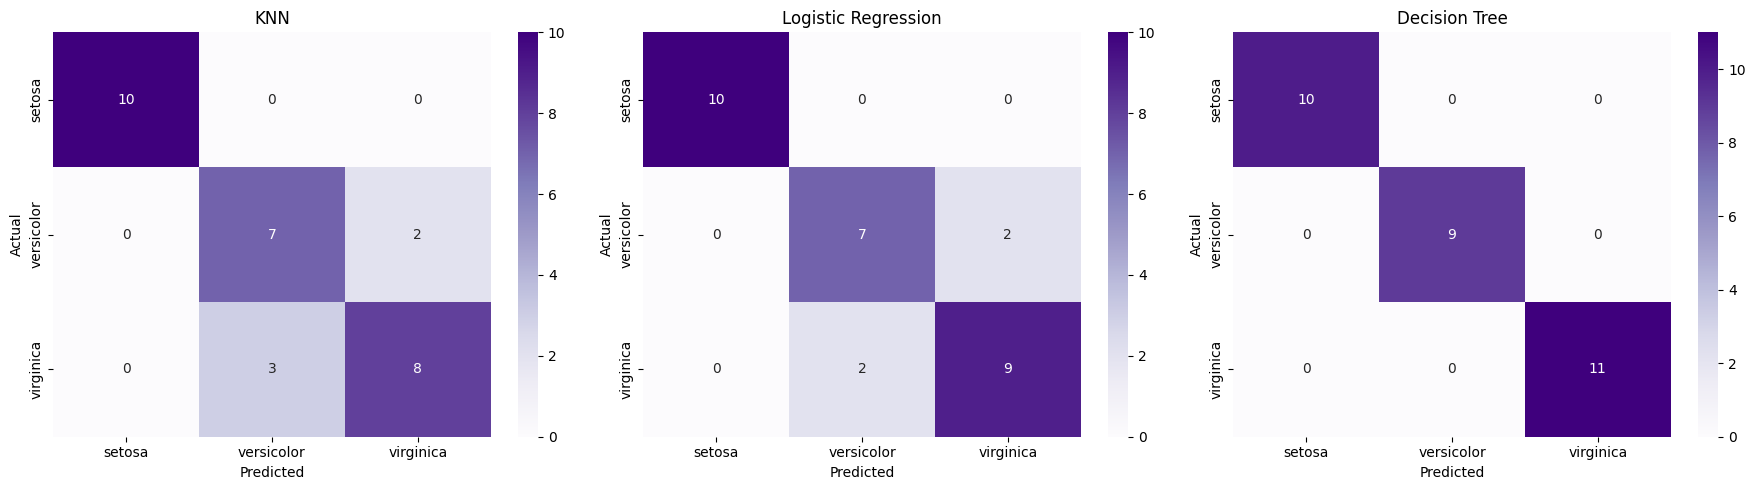

In [ ]:
# Confusion Matrices
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "KNN": knn.predict(X_test_scaled),
    "Logistic Regression": logreg.predict(X_test_scaled),
    "Decision Tree": tree.predict(X_test)
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (title, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=ax,
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions for each model
models = {
    "KNN": knn.predict(X_test_scaled),
    "Logistic Regression": logreg.predict(X_test_scaled),
    "Decision Tree": tree.predict(X_test)
}

# Print the confusion matrix numbers for each model
for title, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {title}:\n")
    print(cm)
    print("\n" + "-"*50 + "\n")


Confusion Matrix for KNN:

[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]

--------------------------------------------------

Confusion Matrix for Logistic Regression:

[[10  0  0]
 [ 0  7  2]
 [ 0  2  9]]

--------------------------------------------------

Confusion Matrix for Decision Tree:

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--------------------------------------------------



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Get predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_tree = tree.predict(X_test)

# Accuracy scores
accuracies = {
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Logistic Regression": accuracy_score(y_test, y_pred_logreg),
    "Decision Tree": accuracy_score(y_test, y_pred_tree)
}

# Classification reports as dicts
report_knn = classification_report(y_test, y_pred_knn, target_names=iris.target_names, output_dict=True)
report_logreg = classification_report(y_test, y_pred_logreg, target_names=iris.target_names, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, target_names=iris.target_names, output_dict=True)

# Create DataFrame
metrics = ["precision", "recall", "f1-score"]
classes = iris.target_names

data = []
for model_name, report in zip(["KNN", "Logistic Regression", "Decision Tree"],
                              [report_knn, report_logreg, report_tree]):
    for cls in classes:
        for metric in metrics:
            data.append({
                "Model": model_name,
                "Class": cls,
                "Metric": metric,
                "Score": report[cls][metric]
            })

df_metrics = pd.DataFrame(data)

In [ ]:
#These plots will clearly show:

#How each model performs overall (accuracy),

#How well each model classifies each flower species (precision, recall, F1).

**Plot 1: Classification Metrics by Class**

<ipython-input-55-85c2988c3f91>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_metrics, x="Class", y="Score", hue="Model", ci=None, palette="Set2", edgecolor=".2", dodge=True)


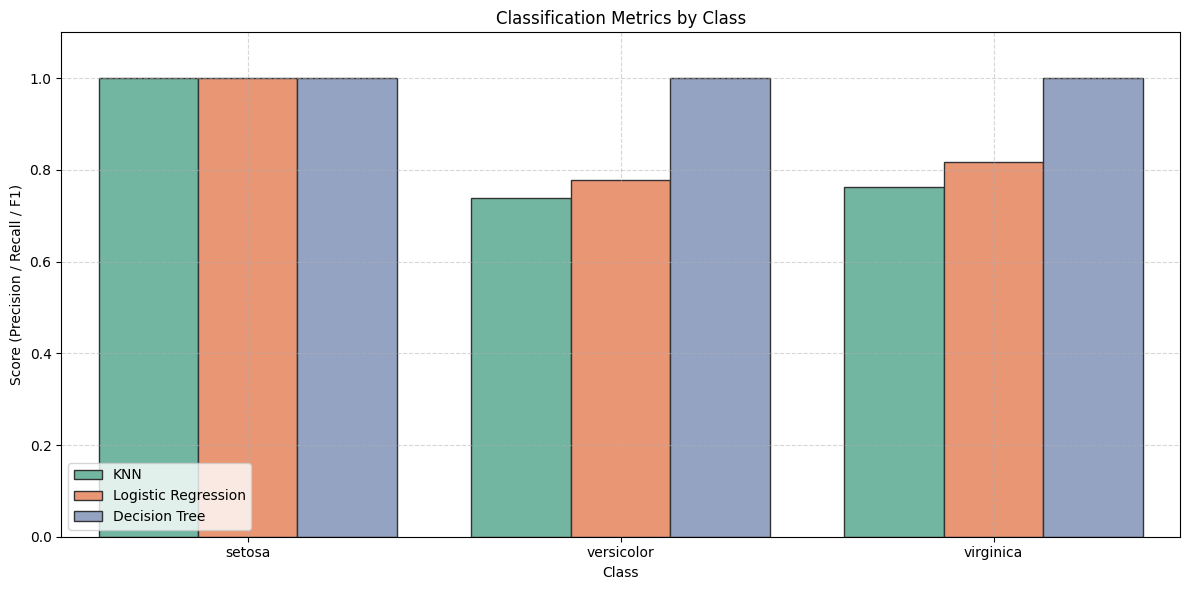

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_metrics, x="Class", y="Score", hue="Model", ci=None, palette="Set2", edgecolor=".2", dodge=True)
plt.title("Classification Metrics by Class")
plt.ylabel("Score (Precision / Recall / F1)")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.legend(loc="lower left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

**Plot 2: Accuracy Comparison**

<ipython-input-56-8a3d5cb73843>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="coolwarm")


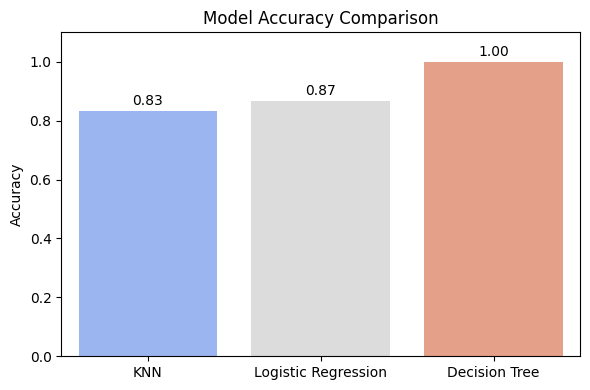

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
for i, val in enumerate(accuracies.values()):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center')
plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'logreg' is your trained LogisticRegression model
# and X_train is your training data (with column names)

# Get feature names
feature_names = iris.feature_names  # or use X.columns if you used a DataFrame

# Get absolute coefficients for each class and average them
# (since LogisticRegression uses one-vs-rest by default for multiclass)
importance = np.mean(np.abs(logreg.coef_), axis=0)

# Create a DataFrame to organize and sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display
print(importance_df)

# Most important feature
most_important = importance_df.iloc[0]
print(f"\nMost important feature: {most_important['Feature']} ({most_important['Importance']:.4f})")


             Feature  Importance
2  petal length (cm)    3.985932
3   petal width (cm)    1.543178
1   sepal width (cm)    1.083140
0  sepal length (cm)    0.468182

Most important feature: petal length (cm) (3.9859)


## **Summary**

### 📊 **Summary of Classification Reports (Before Hyperparameter Tuning)**:

#### 🔹 **KNN (K-Nearest Neighbors)**:

* **Accuracy**: 83%
* **Setosa**: Perfect precision and recall (1.00).
* **Versicolor**: Lower precision (0.70) but decent recall (0.78).
* **Virginica**: Precision (0.80) and recall (0.73) show a good performance, though not as high as Setosa.
* **Observation**: **KNN** performs reasonably well, but there's some loss in performance for **Versicolor** and **Virginica**.

#### 🔹 **Logistic Regression**:

* **Accuracy**: 87%
* **Setosa**: Perfect precision and recall (1.00).
* **Versicolor**: Balanced precision (0.78) and recall (0.78), slightly better than KNN.
* **Virginica**: High precision (0.82) and recall (0.82), showing strong performance.
* **Observation**: **Logistic Regression** has better overall performance than KNN, with more balanced results across classes.

#### 🔹 **Decision Tree**:

* **Accuracy**: 100%
* **Setosa, Versicolor, Virginica**: Perfect precision, recall, and F1-score (1.00) across all classes.
* **Observation**: **Decision Tree** achieves perfect accuracy, but this suggests **overfitting**, as the model is likely memorizing the training data, including noise.

---

### ⚡ **Key Takeaways**:

* **KNN** and **Logistic Regression** perform similarly with **Logistic Regression** having a slight edge in accuracy (87% vs 83%).
* **Decision Tree** performs perfectly but likely suffers from **overfitting**.
* The models are showing **strong performance**, but the **noise** in the dataset may be affecting **KNN** and **Logistic Regression** more than **Decision Tree**.

---


In [ ]:
print("Original X_train shape:", X_train.shape)
print("Noisy X_train shape:", X_train_noisy.shape)
print("Scaled X_train shape:", X_train_scaled.shape)

print("Original X_test shape:", X_test.shape)
print("Noisy X_test shape:", X_test_noisy.shape)
print("Scaled X_test shape:", X_test_scaled.shape)

Original X_train shape: (120, 4)
Noisy X_train shape: (120, 4)
Scaled X_train shape: (120, 4)
Original X_test shape: (30, 4)
Noisy X_test shape: (30, 4)
Scaled X_test shape: (30, 4)
